In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

%matplotlib inline

In [14]:
#read data from .CSV
df = pd.read_csv('PP_creep.csv')
xdata = np.array(df['time'])
ydata = np.array(df['modulus'])

In [15]:
#define the fitting function
E1 = 64
E2 = 16
def func(x, eta):
    return 1/((1/(E1+E2))+(1/E1-(1/(E1+E2)))*(1-np.exp(-x/((eta/E2)*((E1+E2)/E1)))))
func_vec = np.vectorize(func)
#curve fit
eta = op.curve_fit(func_vec, xdata, ydata, p0 = [1400],bounds = (1400, 1500))[0]
print("fitted parameter eta  = ", eta[0])
time = np.arange(1, 401, 1)
creep_modulus = func(time, eta)

fitted parameter eta  =  1468.1844552730215


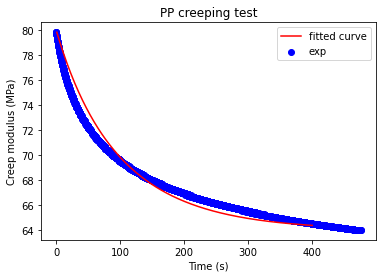

In [16]:
#plotting the data scatter and fitted curve
plt.scatter(xdata, ydata, color = 'b', label = 'exp')
plt.plot(time, creep_modulus, color = 'r', label = 'fitted curve')
plt.title("PP creeping test")
plt.xlabel("Time (s)")
plt.ylabel("Creep modulus (MPa)")
plt.legend()

In [17]:
#example 2
x_group = np.array([3, 6.1, 9.1, 11.9, 14.9])
y_group = np.array([0.0221, 0.0491, 0.0711, 0.0971, 0.1238])
np.shape(x_group)
def f_1(x, A, B):
    return A * x + B
A, B = op.curve_fit(f_1, x_group, y_group, p0 = [1, 0.003])[0]

Text(0.5, 1.0, '0.00849x-0.00378=y')

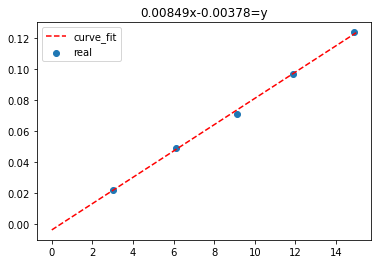

In [18]:
plt.scatter(x_group, y_group, marker='o',label='real')
x = np.arange(0, 15, 0.01)
y =  A * x + B
plt.plot(x, y, '--', color='red',label='curve_fit')
plt.legend()
plt.title('%.5fx%.5f=y' % (A, B))

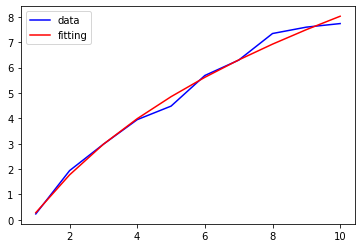

In [19]:
#example 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def test(x, a, b, c): 
        return (a + b*np.log(x) + c*np.log(x)**2)

func = np.vectorize(test)

#Create some dummy data
x_data = list(range(1, 11))
y_data = np.log(x_data) + np.log(x_data)**2 + np.random.random(10)

plt.plot(x_data, y_data, 'b-', label='data')

popt, pcov = curve_fit(test, x_data, y_data)
x = list(range(1, 11))
y= popt[0] + popt[1]*np.log(x) + popt[2]*np.log(x)**2
plt.plot(x,y, 'r-', label = 'fitting')
plt.legend()